# Clustering

In [29]:
from scipy.cluster.hierarchy import linkage, fcluster
from matplotlib import pyplot as plt
import seaborn as sns, pandas as pd
from scipy.cluster.vq import kmeans, vq
import numpy as np

In [4]:
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

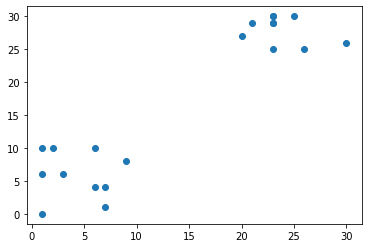

In [5]:
# Import plotting class from matplotlib library
from matplotlib import pyplot as plt

# Create a scatter plot
plt.scatter(x, y)

# Display the scatter plot
plt.show()

In [6]:
df = pd.DataFrame({'x_coordinates': x,
                  'y_coordinates': y})

In [7]:
Z = linkage(df,'ward') #based on sum of squares ward method
df['cluster_labels'] = fcluster(Z,3, criterion = 'maxclust')

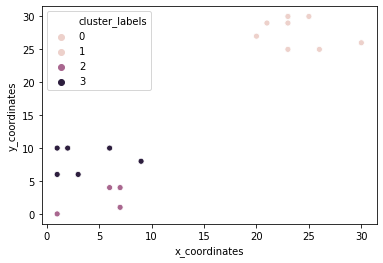

In [8]:
sns.scatterplot(x='x_coordinates', y = 'y_coordinates', hue = 'cluster_labels', data = df)
plt.show()

In [9]:
import random
random.seed((1000,2000))

In [ ]:
# Compute cluster centers
centroids,_ = kmeans(df, 2)

# Assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

# Cluster preperation (scaling data with whiten)

In [18]:
# Import the whiten function
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)
print(scaled_data)

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


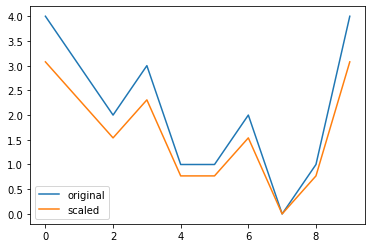

In [19]:
# Plot original data
plt.plot(goals_for, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

# Show the legend in the plot
plt.legend()

# Display the plot
plt.show()

# Normalization of small numbers

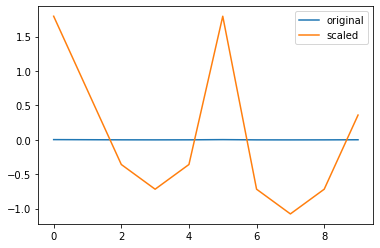

In [20]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()

# Hierarchial Clustering

In [ ]:
df = pd.read_csv("cluster1df.csv")
print(df.head())


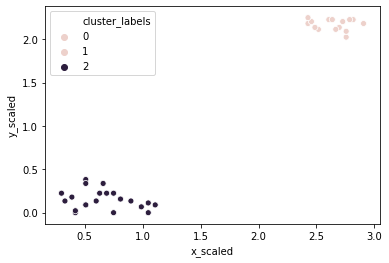

In [32]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(df[['x_scaled', 'y_scaled']], method = 'ward', metric = 'euclidean')

# Assign cluster labels
df['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = df)
plt.show()

# Hierarcial cluster single method

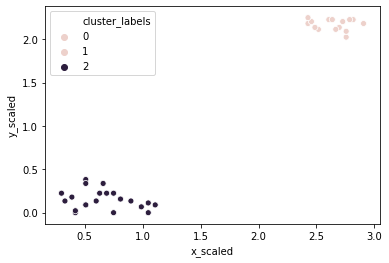

In [35]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(df[['x_scaled', 'y_scaled']], method = 'single', metric = 'euclidean')

# Assign cluster labels
df['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = df)
plt.show()

# Hierarchial clustering complete method

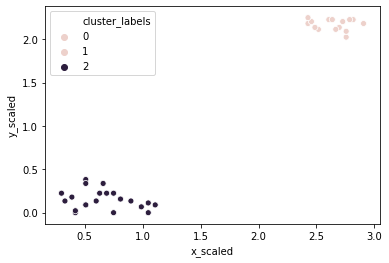

In [36]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(df[['x_scaled', 'y_scaled']], method = 'single', metric = 'euclidean')

# Assign cluster labels
df['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = df)
plt.show()

# Visualizing Clusters

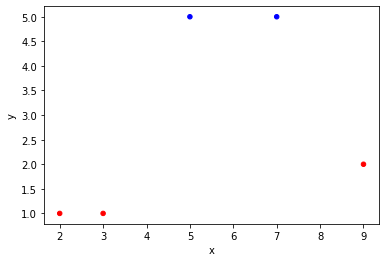

In [40]:
from matplotlib import pyplot as plt
import seaborn as sns
df2 = pd.DataFrame({'x': [2,3,5,7,9],
                   'y': [1,1,5,5,2],
                   'labels': ['A','A','B','B','A']})
colors = {'A':'red', 'B':'blue'}

df2.plot.scatter(x='x',
                y='y',
                c=df2['labels'].apply(lambda x: colors[x]))
plt.show()

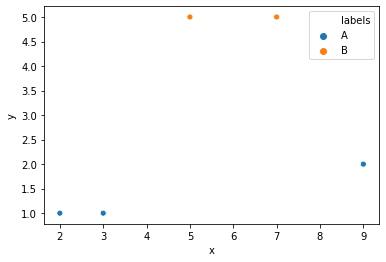

In [41]:
# PERFER SEABORN
sns.scatterplot(x='x',
                y='y',
                hue= 'labels',
                data = df2)
plt.show()

# Visualizing how to Decide number of  Clusters
# Dendrogram

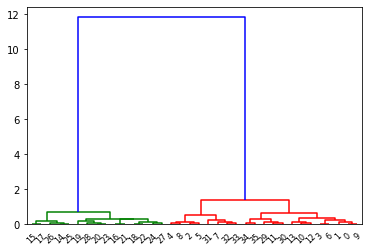

In [43]:
from scipy.cluster.hierarchy import dendrogram

distancematrix = linkage(df[['x_scaled', 'y_scaled']], method = 'ward', metric = 'euclidean')
dn = dendrogram(distancematrix)
plt.show()

# K means Clustering

In [36]:
# Create x, where x the 'scores' column's values as floats
from sklearn.preprocessing import MinMaxScaler
    
scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_scaled.columns = ['x_scaled', 'y_scaled','cluster_labels']

In [37]:
df_scaled.head()

,x_scaled,y_scaled,cluster_labels
0,0.275862,0.266667,1.0
1,0.172414,0.133333,0.5
2,0.034483,0.333333,1.0
3,0.068966,0.200000,1.0
4,0.000000,0.000000,0.5


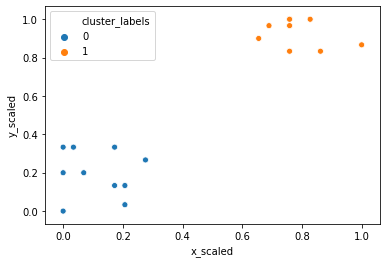

In [39]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(df_scaled[['x_scaled', 'y_scaled']], 2)

# Assign cluster labels
df_scaled['cluster_labels'], distortion_list = vq(df_scaled[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = df_scaled)
plt.show()

 <h1> How many clusters is optimal <h1>

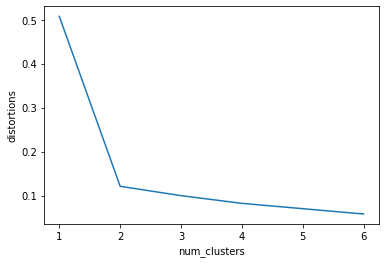

In [40]:
distortions = [] # make empty lsit
num_clusters = range(1, 7) # rane from 1 to 7

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(df_scaled[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)

# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

# Impact of seeds on clusters

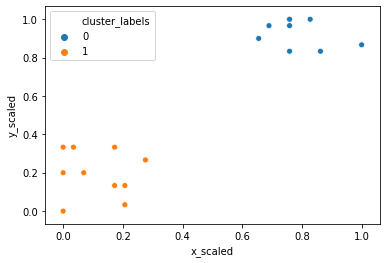

In [41]:
# Import random class
from numpy import random

# Initialize seed
random.seed(0)

# Run kmeans clustering
cluster_centers, distortion = kmeans(df_scaled[['x_scaled', 'y_scaled']], 2)
df_scaled['cluster_labels'], distortion_list = vq(df_scaled[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = df_scaled)
plt.show()

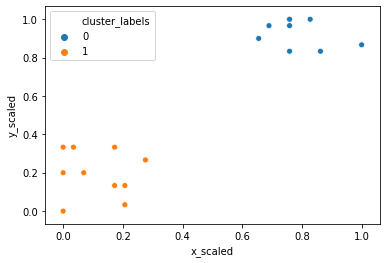

In [42]:
# Import random class
from numpy import random

# Initialize seed
random.seed([1, 2, 1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(df_scaled[['x_scaled', 'y_scaled']], 2)
df_scaled['cluster_labels'], distortion_list = vq(df_scaled[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = df_scaled)
plt.show()

In [47]:
df3 = pd.read_csv("fifa_18_dataset.csv")
df3.head()

,sliding_tackle,aggression
0,23,63
1,26,48
2,33,56
3,38,78
4,11,29


In [51]:
# Create x, where x the 'scores' column's values as floats
from sklearn.preprocessing import MinMaxScaler
    
scaler = MinMaxScaler()

df_scaled2 = pd.DataFrame(scaler.fit_transform(df3), columns=df.columns)

df_scaled2.columns = ['scaled_def', 'scaled_phy']
df_scaled2.head()
fifa = df_scaled2

In [52]:
# Set up a random seed in numpy
random.seed([1000,2000])

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa['cluster_labels'], _ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

# Display cluster centers 
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

                scaled_def  scaled_phy
cluster_labels                        
0                 0.691769    0.657827
1                 0.158556    0.229643
2                 0.335789    0.525337


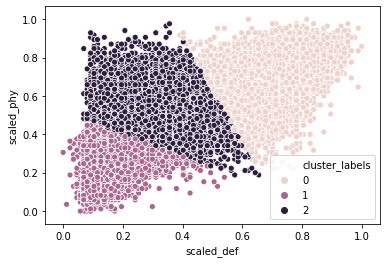

In [53]:
# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa)
plt.show()

# Image Clustering Real World Example

In [75]:
import matplotlib.image as img

# Read batman image and print dimensions
batman_image = img.imread('batman.jpg')
print(batman_image.shape)



(211, 337, 3)


In [76]:
# Store RGB values of all pixels in lists r, g and b
r = []
g = []
b = []
# Store RGB values of all pixels in lists r, g and b
for row in batman_image:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)



# For some reason can only pass 2 columns at once so must divide and cbind

In [126]:
# pass 2 columns then the third
dfz2= [['r','g'], [r,g]]
column_names = dfz2.pop(0)
batman_df2 = pd.DataFrame(dfz2, columns=column_names)

batman_df2.head()

dfz3= [['b'], [b]]
column_names = dfz3.pop(0)
batman_df3 = pd.DataFrame(dfz3, columns=column_names)

batman_df3.head()
batman_df2.head()

,r,g
0,"[28, 33, 33, 34, 20, 27, 20, 10, 0, 1, 3, 0, 2...","[25, 30, 29, 34, 23, 36, 34, 29, 25, 30, 32, 2..."


In [124]:
def explode(df, lst_cols, fill_value='', preserve_index=False):
    # make sure `lst_cols` is list-alike
    if (lst_cols is not None
        and len(lst_cols) > 0
        and not isinstance(lst_cols, (list, tuple, np.ndarray, pd.Series))):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    # create "exploded" DF
    res = (pd.DataFrame({
                col:np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx)
             .assign(**{col:np.concatenate(df.loc[lens>0, col].values)
                            for col in lst_cols}))
    # append those rows that have empty lists
    if (lens == 0).any():
        # at least one list in cells is empty
        res = (res.append(df.loc[lens==0, idx_cols], sort=False)
                  .fillna(fill_value))
    # revert the original index order
    res = res.sort_index()
    # reset index if requested
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res

# Get red green and blue and expand columns

In [127]:
batman_df2 = explode(batman_df2, ['r','g'], fill_value='')
batman_df2.head()


,r,g
0,28,25
1,33,30
2,33,29
3,34,34
4,20,23


In [129]:
batman_df3 = explode(batman_df3, ['b'], fill_value='')
batman_df3.head()

,b
0,16
1,23
2,26
3,34
4,28


In [130]:
df2b = batman_df2[['r','g']]
df2b.describe()

,r,g
count,71107.000000,71107.000000
mean,87.695417,79.946152
std,74.648266,74.366983
min,0.000000,0.000000
25%,11.000000,8.000000
50%,97.000000,79.000000
75%,135.000000,147.000000
max,255.000000,255.000000


In [131]:
df3b = batman_df3[['b']]
df3b.describe()

,b
count,71107.000000
mean,90.055972
std,85.374025
min,0.000000
25%,12.000000
50%,78.000000
75%,150.000000
max,255.000000


# Now scale them 

In [132]:
# Create x, where x the 'scores' column's values as floats
from sklearn.preprocessing import MinMaxScaler
    
scaler = MinMaxScaler()

batman_df22 = pd.DataFrame(scaler.fit_transform(df2b), columns=df2b.columns)

batman_df22.columns = ['scaled_red', 'scaled_green']
batman_df22.head()


,scaled_red,scaled_green
0,0.109804,0.098039
1,0.129412,0.117647
2,0.129412,0.113725
3,0.133333,0.133333
4,0.078431,0.090196


In [134]:
batman_df33 = pd.DataFrame(scaler.fit_transform(df3b), columns=df3b.columns)

batman_df33.columns = ['scaled_blue']
batman_df33.head()

,scaled_blue
0,0.062745
1,0.090196
2,0.101961
3,0.133333
4,0.109804


In [145]:
batman_df = pd.concat([batman_df22.reset_index(drop=True), batman_df33], axis=1)
batman_df.head()

,scaled_red,scaled_green,scaled_blue
0,0.109804,0.098039,0.062745
1,0.129412,0.117647,0.090196
2,0.129412,0.113725,0.101961
3,0.133333,0.133333,0.133333
4,0.078431,0.090196,0.109804


# How many dominant colors

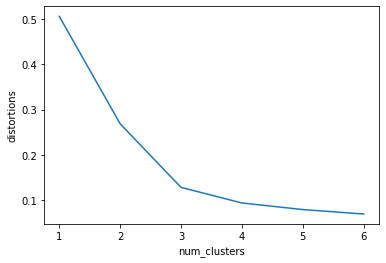

In [137]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_red', 'scaled_green','scaled_blue']], i)
    distortions.append(distortion)

# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

# Rename and merge origional data to dataframe

In [146]:
batman_df = pd.concat([batman_df.reset_index(drop=True), df2b], axis=1)
batman_df = pd.concat([batman_df.reset_index(drop=True), df3b], axis=1)
batman_df = batman_df.rename({'r': 'red', 'g': 'green','b':'blue'}, axis=1)  # new method
batman_df.head()

,scaled_red,scaled_green,scaled_blue,red,green,blue
0,0.109804,0.098039,0.062745,28,25,16
1,0.129412,0.117647,0.090196,33,30,23
2,0.129412,0.113725,0.101961,33,29,26
3,0.133333,0.133333,0.133333,34,34,34
4,0.078431,0.090196,0.109804,20,23,28


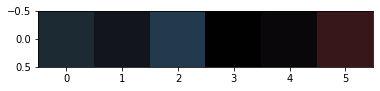

In [148]:
# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()

colors = []
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))

# Display colors of cluster centers
plt.imshow([colors])
plt.show()

# Clustering Documents
TF-IDF MATRIX

In [156]:
dfn = pd.read_csv("movies_plot.csv")
dfn.head()

,Title,Plot
0,The Ballad of Cable Hogue,"Cable Hogue is isolated in the desert, awaitin..."
1,Monsters vs. Aliens,"In the far reaches of space, a planet explodes..."
2,The Bandit Queen,Zarra Montalvo is the daughter of an American ...
3,Broken Arrow,Major Vic Deakins (John Travolta) and Captain ...
4,Dolemite,Dolemite is a pimp and nightclub owner who is ...


In [159]:
plots = dfn['Plot'].tolist()

In [160]:
from nltk.tokenize import word_tokenize
import re

def remove_noise(text, stop_words = []):
    tokens = word_tokenize(text)
    cleaned_tokens = []
    for token in tokens:
        token = re.sub('[^A-Za-z0-9]+', '', token)
        if len(token) > 1 and token.lower() not in stop_words:
            # get lowercase
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

In [162]:
# Import TfidfVectorizer class from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('punkt')

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.75, max_features=50,
                                   min_df=0.1, tokenizer=remove_noise)

# Use the .fit_transform() method on the list plots
tfidf_matrix = tfidf_vectorizer.fit_transform(plots)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\blake\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [163]:
num_clusters = 2

# Generate cluster centers through the kmeans function
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

# Generate terms from the tfidf_vectorizer object
terms = tfidf_vectorizer.get_feature_names()

for i in range(num_clusters):
    # Sort the terms and print top 3 terms
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:3])

['him', 'they', 'who']
['her', 'she', 'him']


In [164]:
fifa.head()

,scaled_def,scaled_phy,cluster_labels
0,0.218391,0.611765,2
1,0.252874,0.435294,2
2,0.333333,0.529412,2
3,0.390805,0.788235,2
4,0.080460,0.211765,1


In [ ]:
# Create centroids with kmeans for 2 clusters
cluster_centers,_ = kmeans(fifa[scaled_features], 2)

# Assign cluster labels and print cluster centers
fifa['cluster_labels'], _ = vq(fifa[scaled_features], cluster_centers)
print(fifa.groupby('cluster_labels')[scaled_features].mean())

# Plot cluster centers to visualize clusters
fifa.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='bar')
plt.show()

# Get the name column of first 5 players in each cluster
for cluster in fifa['cluster_labels'].unique():
    print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:5])